<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Множественное тестирование»</b></h3>


# Данные A/B/N тестирования 

<div class="alert alert-info">
    
Импортируем все необходимые библиотеки и считаем файл.


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
 
import matplotlib.pyplot as plt
%matplotlib inline
 

from scipy import stats # При работе со статистикой

<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой уже знакомую нам информацию про жителей некоторого города - Атлантас.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

In [2]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head(6)

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
5,1,3.0,2.474979e+06,0,21.0,Homemaker,1.001654e+07,1.0,0.326801


In [4]:
data['profession'].value_counts()

profession
Healthcare       680
Homemaker        674
Lawyer           670
Artist           669
Entertainment    668
Marketing        666
Executive        660
Doctor           658
Engineer         655
Name: count, dtype: int64

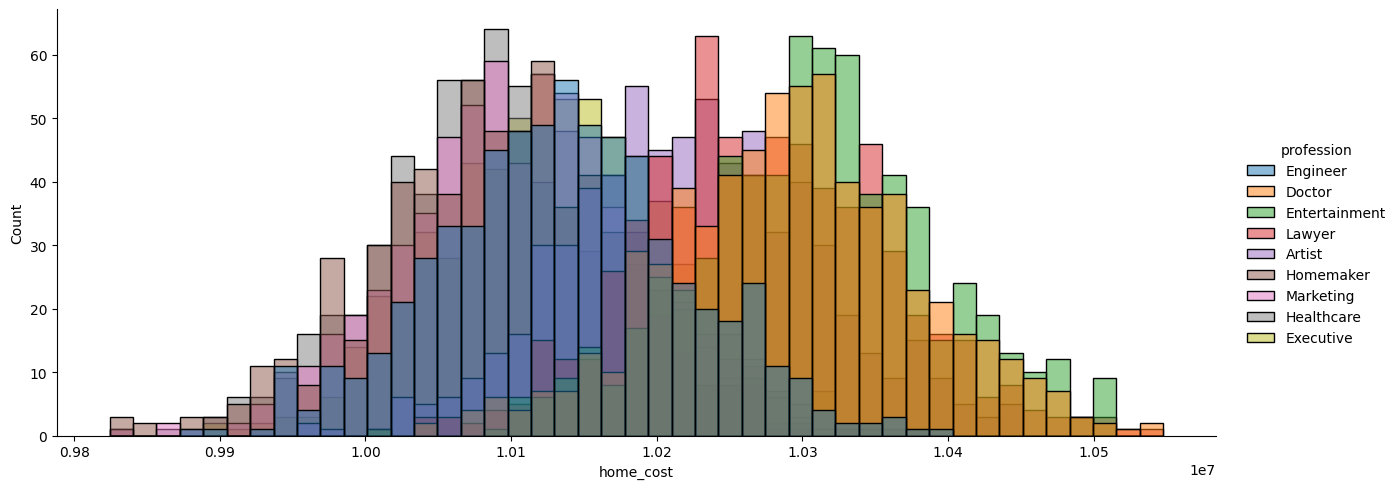

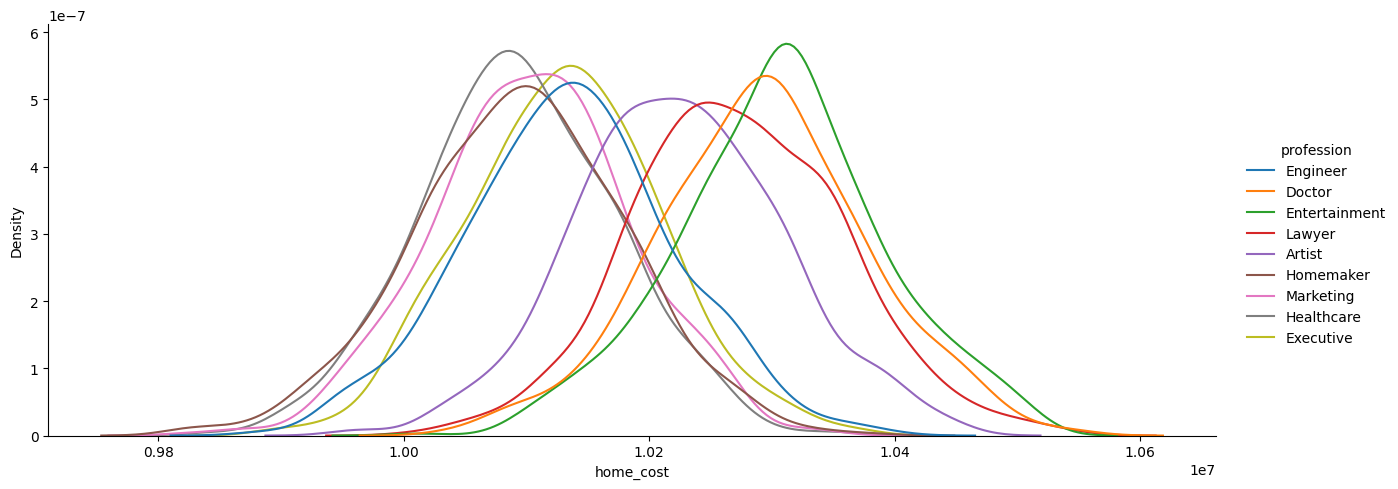

In [5]:
data = data[data["home_cost"] < 18 * 10 ** 6]  # Обрежим выбросы

# Гистограмма
sns.displot(data, x="home_cost", hue="profession", bins=45, height=5, aspect=2.5)

# Гистограмма со сглаживанием для удобства восприятия
sns.displot(data, x="home_cost", hue="profession", height=5, aspect=2.5, kind="kde")

<Axes: xlabel='profession', ylabel='home_cost'>

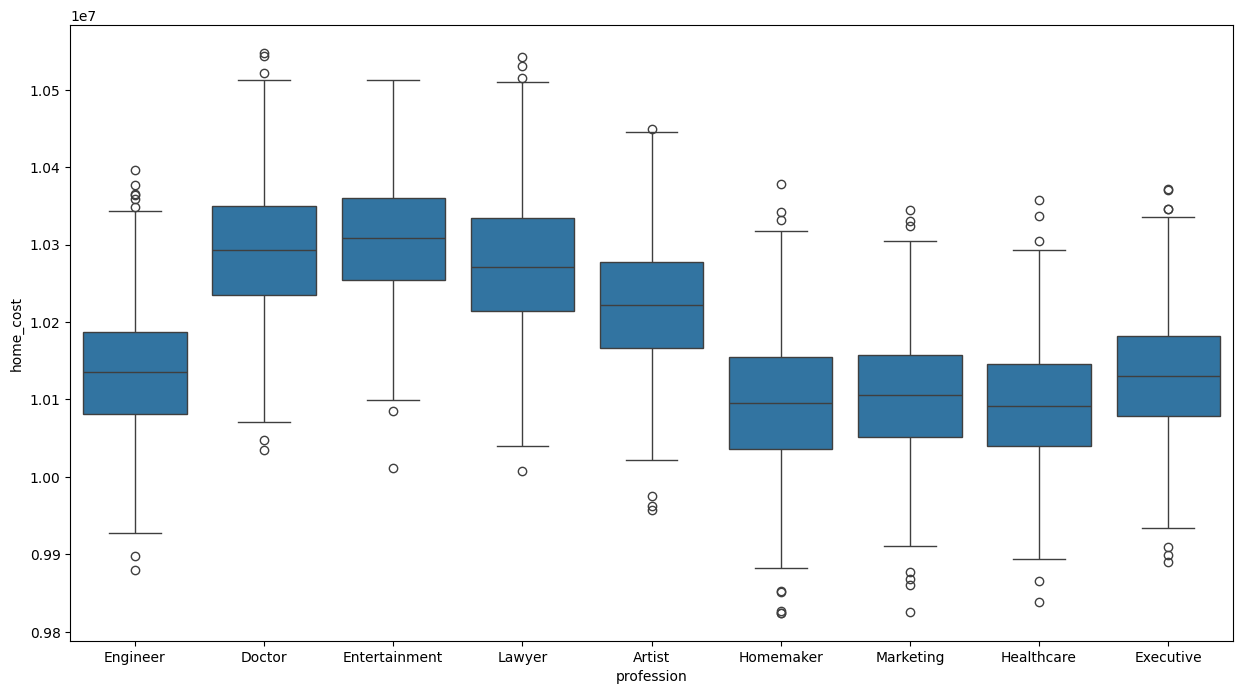

In [10]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data, x="profession", y="home_cost")

<div class="alert alert-warning">
    
Что если просто взять t-test и начать сравнивать попарно???    

Тогда вероятность неверно отклонить нулевую гипотезу хотя бы для одного сегмента при $\alpha = \%5$ и $n=9$: 

$$ P = 1 - (1 - \alpha)^n = 1-(1-5\%)^9= 37 \% $$ 



In [11]:
1-(1-5/100)**9

0.3697505902753909

# Дисперсионнай анализ и Крускал Уоллис тест

Так же как для двух групп у нас параметрический критерий Стьюдента и непараметрический критерий Манна-Уитни как и для нескольких групп есть еще непараметрический **критерий Крускала Уоллиса** и параметрический **дисперсионный анализ**. 


In [12]:
from scipy import stats

alpha = 0.01

Healthcare = data[data["profession"] == "Healthcare"]["home_cost"].values
Homemaker = data[data["profession"] == "Homemaker"]["home_cost"].values
Lawyer = data[data["profession"] == "Lawyer"]["home_cost"].values
Artist = data[data["profession"] == "Artist"]["home_cost"].values
Entertainment = data[data["profession"] == "Entertainment"]["home_cost"].values
Marketing = data[data["profession"] == "Marketing"]["home_cost"].values
Doctor = data[data["profession"] == "Doctor"]["home_cost"].values
Executive = data[data["profession"] == "Executive"]["home_cost"].values
Engineer = data[data["profession"] == "Engineer"]["home_cost"].values

In [13]:
# Используем дисперсионнай анализ
statistic, pvalue = stats.f_oneway(
    Healthcare,
    Homemaker,
    Lawyer,
    Artist,
    Entertainment,
    Marketing,
    Doctor,
    Executive,
    Engineer,
)

print("statistic = {}, p-value = {}".format(statistic, pvalue))

if pvalue > alpha:  # Интерпретируем результат
    print("Одинаковое распределение (не отвергаем H0)")
else:
    print("Разное распределение (отклоняем H0)")
    print("Выборки отличаются статистически значимо")

statistic = 766.5352565638482, p-value = 0.0
Разное распределение (отклоняем H0)
Выборки отличаются статистически значимо


In [14]:
# Теперь вычисляем Крускал Уоллис тест
statistic, pvalue = stats.kruskal(
    Healthcare,
    Homemaker,
    Lawyer,
    Artist,
    Entertainment,
    Marketing,
    Doctor,
    Executive,
    Engineer,
)


print("statistic = {}, p-value = {}".format(statistic, pvalue))

if pvalue > alpha:  # Интерпретируем результат
    print("Одинаковое распределение (не отвергаем H0)")
else:
    print("Разное распределение (отклоняем H0)")
    print("Выборки отличаются статистически значимо")

statistic = 3160.333964953861, p-value = 0.0
Разное распределение (отклоняем H0)
Выборки отличаются статистически значимо


<div class="alert alert-warning">
    
Группы отличаются, что было очевидно из графика выше, то теперь мы еще и знаем, что результат статистически значим

# А если взять схожие группы?

<Axes: xlabel='home_cost', ylabel='profession'>

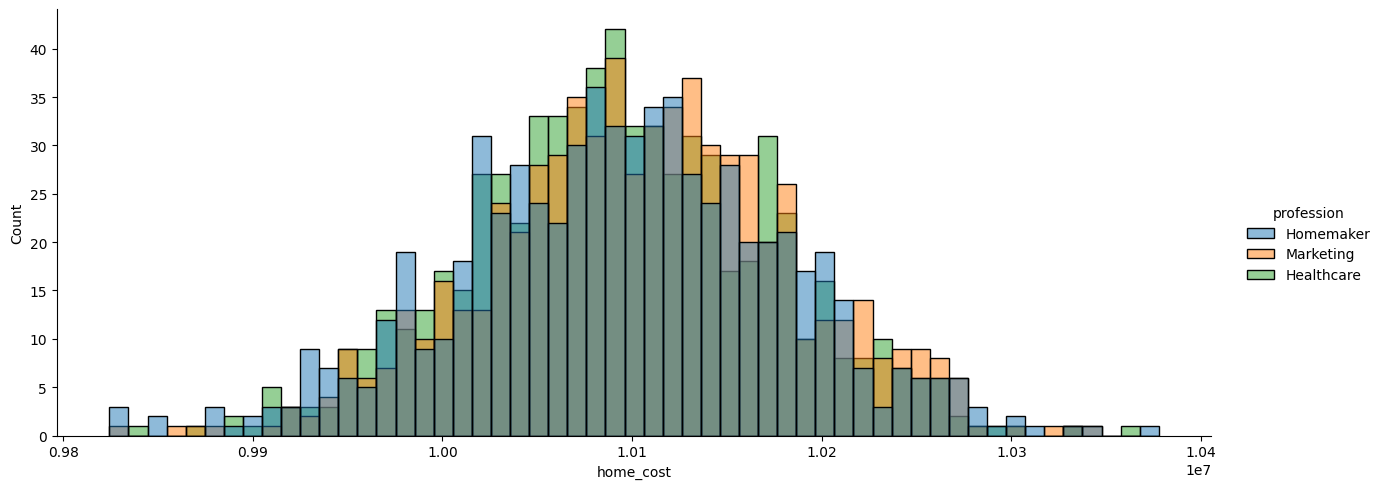

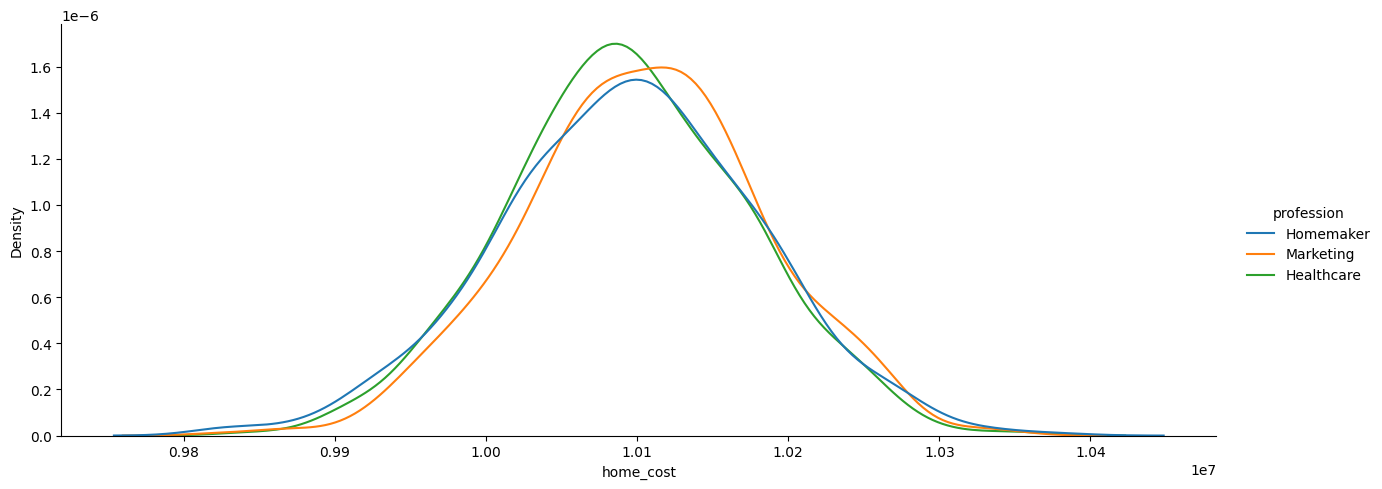

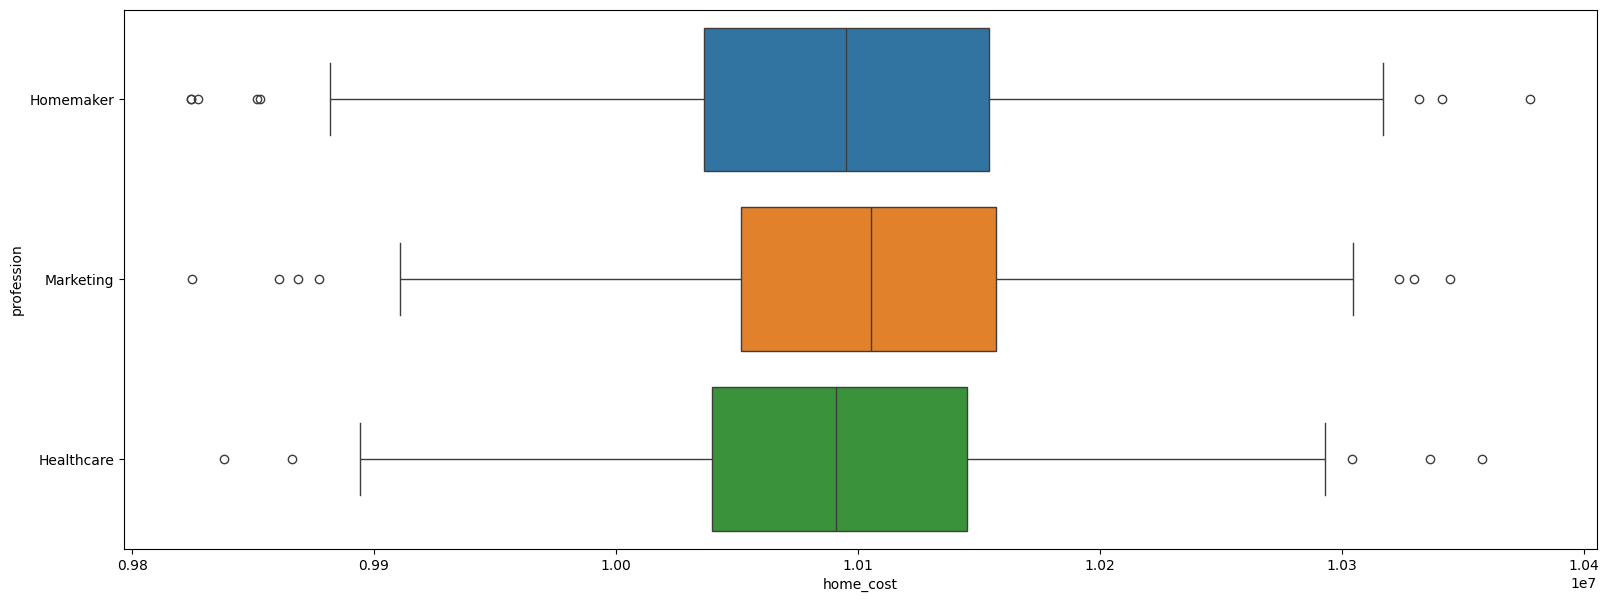

In [16]:
# Отберем только похожие группы
sub_data = data[data["profession"].isin(["Healthcare", "Homemaker", "Marketing"])]

# Гистограммы
sns.displot(sub_data, x="home_cost", hue="profession", bins=55, height=5, aspect=2.5)

# Гистограммы со сглаживанием
sns.displot(sub_data, x="home_cost", hue="profession", height=5, aspect=2.5, kind="kde")

# Бокс-плоты
plt.figure(figsize=(19, 7))
sns.boxplot(data=sub_data, y="profession", x="home_cost", hue="profession", orient='h')

In [17]:
Healthcare = data[data["profession"] == "Healthcare"]["happyness"].values
Homemaker = data[data["profession"] == "Homemaker"]["happyness"].values
Marketing = data[data["profession"] == "Marketing"]["happyness"].values

In [18]:
# Используем дисперсионнай анализ
statistic, pvalue = stats.kruskal(Healthcare, Homemaker, Marketing)

print("statistic = {}, p-value = {}".format(statistic, pvalue))

if pvalue > alpha:  # Интерпретируем результат
    print("Одинаковое распределение (не отвергаем H0)")
else:
    print("Разное распределение (отклоняем H0)")
    print("Выборки отличаются статистически значимо")

statistic = 92.00679286609284, p-value = 1.0494911491377843e-20
Разное распределение (отклоняем H0)
Выборки отличаются статистически значимо


In [20]:
# Проверим с помощью теста Шапиро!


statistic, p_value = stats.shapiro(sub_data["home_cost"])
print("Статистики=%.3f, p=%.3f" % (statistic, p_value))

if p_value > 0.05:  # Интерпретируем
    # H_0 = Распределение нормальное
    print("Нормальное распределение (не отвергаем H0)")
    print("Это даже видно из гистограммы ниже")
else:
    print("Не нормальное распределения (отвергаем H0)")

Статистики=0.999, p=0.581
Нормальное распределение (не отвергаем H0)
Это даже видно из гистограммы ниже


In [21]:

# Используем дисперсионнай анализ
statistic, pvalue = stats.f_oneway(Healthcare, Homemaker, Marketing)

print("statistic = {}, p-value = {}".format(statistic, pvalue))

if pvalue > alpha:  # Интерпретируем результат
    print("Одинаковое распределение (не отвергаем H0)")
else:
    print("Разное распределение (отклоняем H0)")
    print("Выборки отличаются статистически значимо")

statistic = 47.32073862248984, p-value = 8.25834443740642e-21
Разное распределение (отклоняем H0)
Выборки отличаются статистически значимо


<div class="alert alert-success">
    
Видим, что дисперсионный анализ не различил выборки, а Крускал-Уоллис заметил различия. Возможно потому, что распределение близко к нормальному, что дает дисперсионному анализу более высокую мощность. 

# Итоги и выводы


* Разобрали, как использовать python для множественном тестировании
* Изучили, как использовать статистические критерии для нескольких
